# Import Libraries & Data for Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
import seaborn as sns
from my_func import *
import pylab

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [16]:
df = pd.read_csv('linreg_ready_data.csv')
display(df.shape)
display(df.columns)

(21597, 71)

Index(['log10_price', 'log10_sqft_living', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117',

# Build The Model

#### Create Test : Train Split

In [3]:
# define our input variable (X) & output variable
X = df.drop(columns='log10_price')
Y = df[['log10_price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Another VIF Check

In [4]:
# the VIFdoes expect a constant term in the data, so we need to add one using the add_constant method
x_1 = sm.tools.add_constant(df.drop(columns='log10_price'))
#X2 = sm.tools.add_constant(df_iter_1)

# create the series for both
vif_check_df = pd.Series([variance_inflation_factor(x_1.values, i) for i in range(x_1.shape[1])], index=x_1.columns)

# display the series
display(vif_check_df.loc[vif_check_df > 5])


const    445.65671
dtype: float64

# Evaluate the Model

In [5]:
# define our intput
X3 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X)

# fit the data
est = model.fit()

# check the data
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:            log10_price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.285e+05
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                        0.00
Time:                        11:27:34   Log-Likelihood:                          7191.0
No. Observations:               21597   AIC:                                 -1.424e+04
Df Residuals:                   21527   BIC:                                 -1.368e+04
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

#### Make Predictions to Test the Model

In [6]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_dollars = 10**y_predict
y_dollars[:5].round(2)

array([[215822.72],
       [353211.36],
       [334146.56],
       [321198.09],
       [657317.44]])

In [7]:
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE = {:.3} ".format(model_mse))
print("MSE = {} ".format(10**model_mse))

print("MAE = {:.3}".format(model_mae))


print("RMSE = {:.3}".format(model_rmse))

MSE = 0.00969 
MSE = 1.0225633188574896 
MAE = 0.0715
RMSE = 0.0984


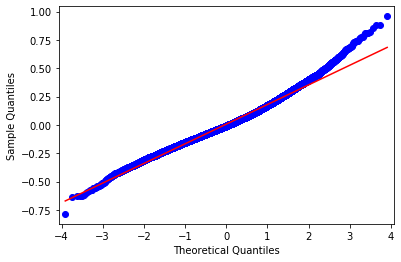

The mean of the residuals is 0.00678


In [8]:
# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [9]:
#return to data cleaning notebook and remove these columns
est.pvalues.loc[est.pvalues>.05]


Series([], dtype: float64)

**if any values are output in the cell above return to the data cleaning notebook and remove that column as it is insignificant**

# Save for Later Use

In [10]:
import pickle

# pickle the model.
with open('kc_county_multilinreg.sav','wb') as f:
     pickle.dump(regression_model,f)

# load it back in to see if everything works
with open('kc_county_multilinreg.sav', 'rb') as pickle_file:
     kc_county_houseprice_predictor = pickle.load(pickle_file)

### Bring back in to see if regression still works

In [11]:
print(X_test.iloc[1])
print('*'*100)
print('These are the only data points:',X_test.iloc[1].loc[X_test.iloc[1] > 1])


log10_sqft_living    3.075547
zipcode_98002        0.000000
zipcode_98003        0.000000
zipcode_98004        0.000000
zipcode_98005        0.000000
                       ...   
zipcode_98177        0.000000
zipcode_98178        0.000000
zipcode_98188        0.000000
zipcode_98198        0.000000
zipcode_98199        0.000000
Name: 10996, Length: 70, dtype: float64
****************************************************************************************************
These are the only data points: log10_sqft_living    3.075547
Name: 10996, dtype: float64


In [12]:
kc_county_houseprice_predictor.predict(np.array(X_test[:1]))


array([[5.33409716]])

In [13]:
#function located in my_func.py to convert log output to readable dollars
log_to_dollars(kc_county_houseprice_predictor.predict(X_test[:1]))

array([[215822.72]])

In [17]:
#output test was a numpy array so just did this so you can see a dollar value
np.asscalar(log_to_dollars(kc_county_houseprice_predictor.predict(X_test[:1])))

C:\Users\blake\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


215822.72